In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
data = pd.read_csv('../../bad_candidates.txt', sep = " ", header=None)
with open("../../scripts/colnames.json", "r", encoding="utf-8") as f:
    check = f.read()
    columns = json.loads(check)
    columns = columns["column_names"]
data.columns = columns

In [3]:
data

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,orig_median_flux,transit_prob
0,/storage/astro2/phrdhx/eleanor-lite-project-v2...,391894274,-17.19220,-5.81439,1335.44793,1.30443,0.00320,0.58455,-9.19996,3.17274,...,227.53726,153.54675,1.55847,1.05169,0.00104,0.00091,0.00081,0.00068,1739.6538,maybeTransit
1,/storage/astro2/phrdhx/eleanor-lite-project-v2...,115190908,-10.81067,-5.06669,1342.76632,0.99722,0.00088,0.19421,-0.04415,794.29085,...,141.53398,141.18611,0.77766,0.77575,0.00102,0.00102,0.00078,0.00078,1055.9952,maybeTransit
2,/storage/astro2/phrdhx/eleanor-lite-project-v2...,128982260,-18.65532,-5.26104,1620.78689,1.20215,0.00152,0.35366,5.72135,1.40396,...,974.82160,809.14790,7.61579,6.32147,0.00046,0.00042,0.00035,0.00032,27803.9360,maybeTransit
3,/storage/astro2/phrdhx/eleanor-lite-project-v2...,361392135,-12.74989,-5.30643,1620.78479,1.45364,0.00221,0.74627,17.87787,9.17097,...,419.36260,285.54277,3.61519,2.46158,0.00072,0.00060,0.00054,0.00044,5630.2930,maybeTransit
4,/storage/astro2/phrdhx/eleanor-lite-project-v2...,260042836,-12.52711,-5.04121,1430.28230,0.99986,0.00049,0.16220,0.26199,12.52429,...,737.03065,736.93996,5.26450,5.26386,0.00033,0.00033,0.00027,0.00027,34928.0350,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47382,/storage/astro2/phrdhx/eleanor-lite-project-v2...,367836139,-9.74785,-5.07284,1949.17696,0.98301,0.00122,0.25835,0.02630,2482.20772,...,189.59640,187.73208,0.82433,0.81623,0.00133,0.00134,0.00105,0.00107,877.8586,maybeTransit
47383,/storage/astro2/phrdhx/eleanor-lite-project-v2...,233659455,-7.70747,-5.03399,1931.32371,1.04327,0.00022,0.24193,-29.22009,74.93199,...,170.24690,162.80276,1.46765,1.40347,0.00046,0.00045,0.00035,0.00034,6172.8257,maybeTransit
47384,/storage/astro2/phrdhx/eleanor-lite-project-v2...,138293627,-13.02315,-6.78366,1949.38913,1.03143,0.00065,0.35246,-30.00000,62.86256,...,168.19502,163.28425,1.15202,1.11839,0.00070,0.00069,0.00055,0.00055,3138.1394,maybeTransit
47385,/storage/astro2/phrdhx/eleanor-lite-project-v2...,359187631,-9.74162,-5.12001,1949.36959,1.05912,0.00073,0.30716,30.00000,103.97470,...,87.45503,82.08795,0.59901,0.56225,0.00094,0.00091,0.00071,0.00069,1062.0159,maybeTransit


In [4]:
data['abs_depth'] = data.depth * data.orig_median_flux
data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
data['abs_path'] = data['path'].apply(lambda x: x.replace('/tmp/eleanor-lite/', '/storage/astro2/phrdhx/eleanor-lite-project-v2/'))


---

In [5]:
sector_data = {}

# Get unique values from the 'Sector' column
sector_values = sorted(data['Sector'].unique())

# Iterate through each unique sector value and create dataframes
for sector in sector_values:
    # Create a reference to the subset of the original DataFrame for the current sector
    sector_df = data[data['Sector'] == sector]
    
    # You can perform any additional data manipulation or filtering here if needed
    
    # Store the sector DataFrame in the dictionary with a meaningful key
    sector_data[f'S{sector}'] = sector_df

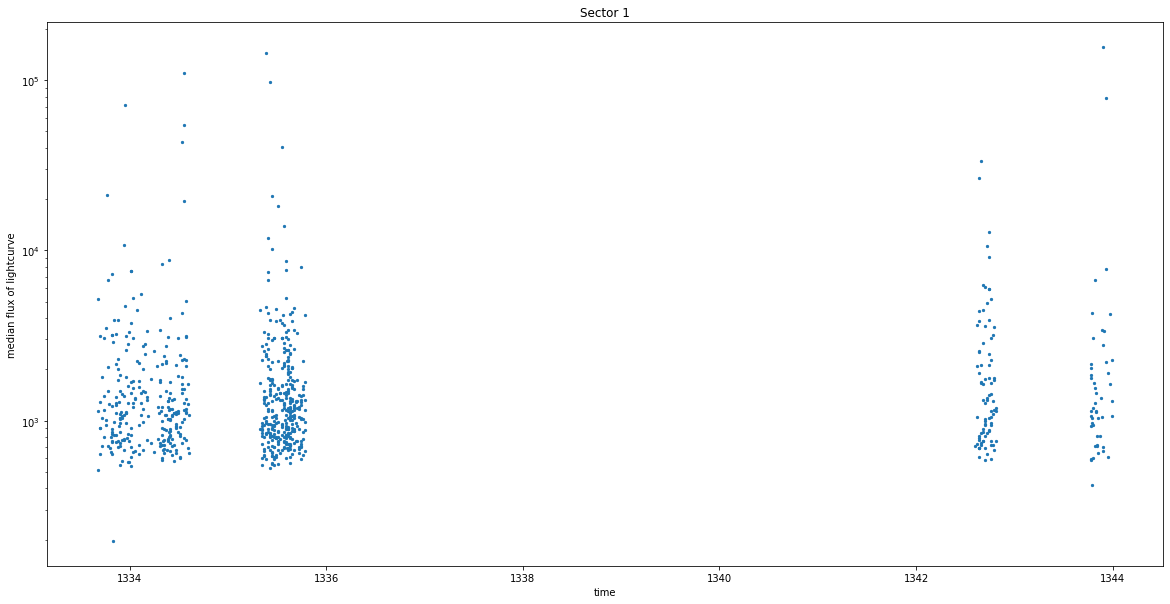

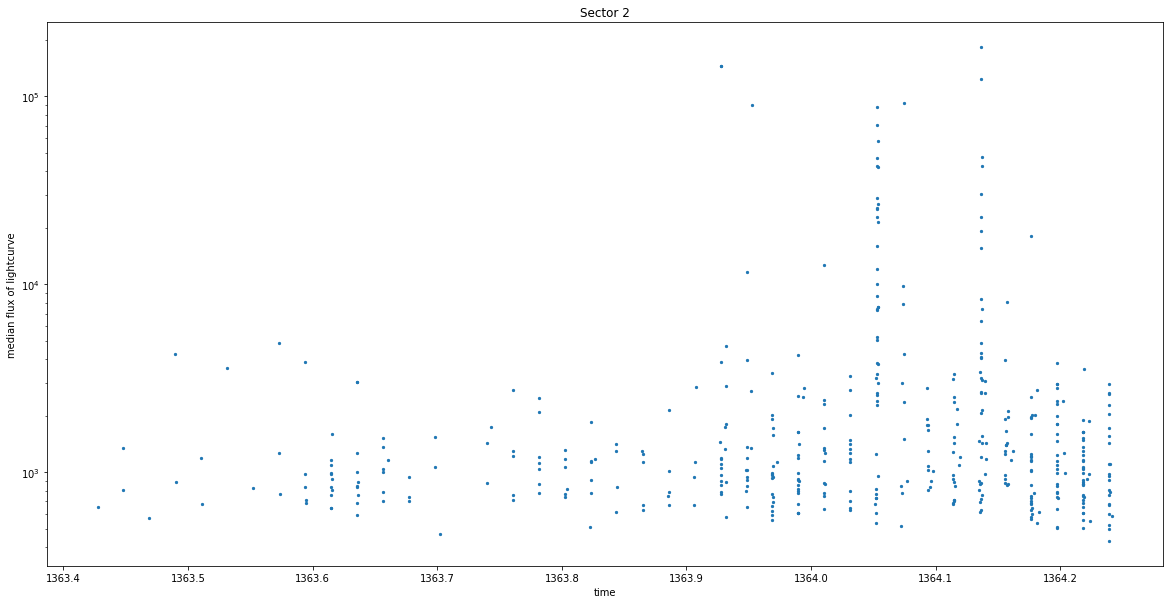

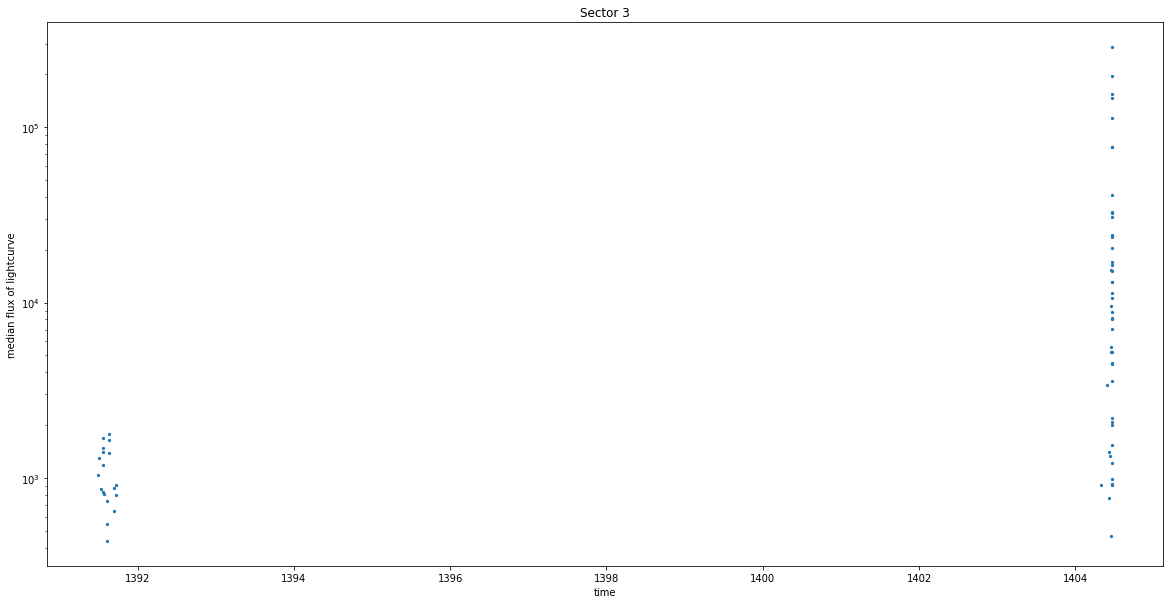

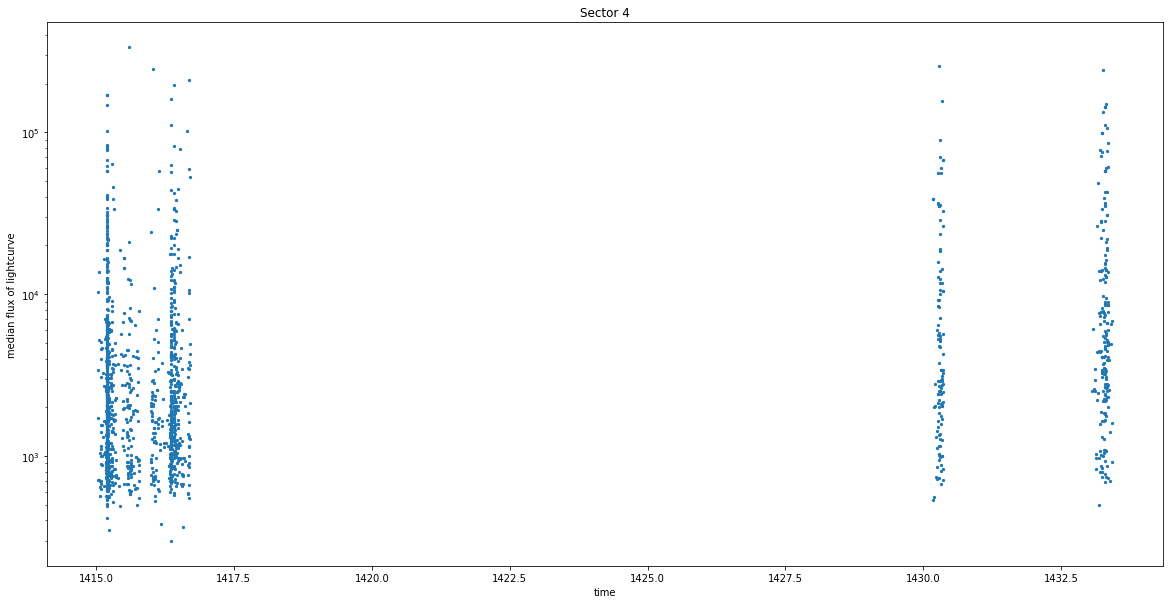

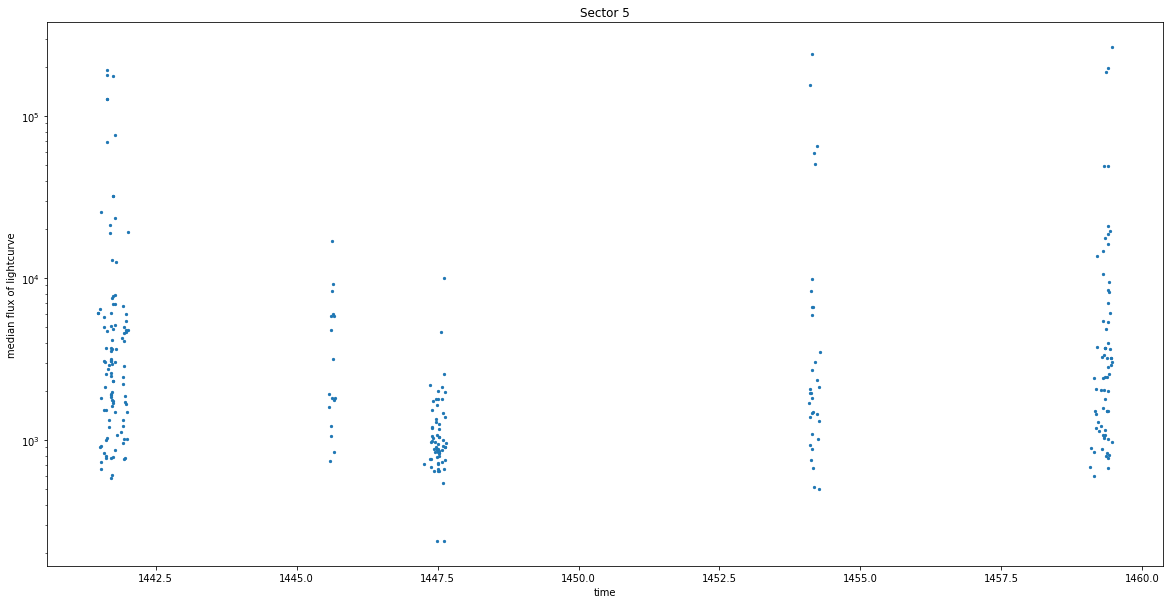

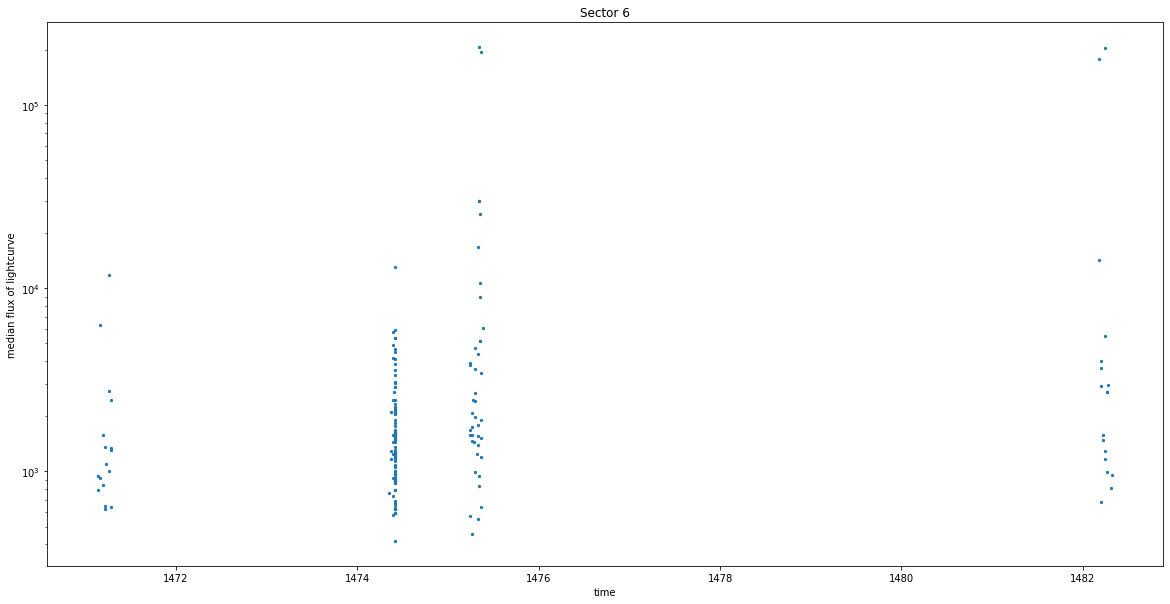

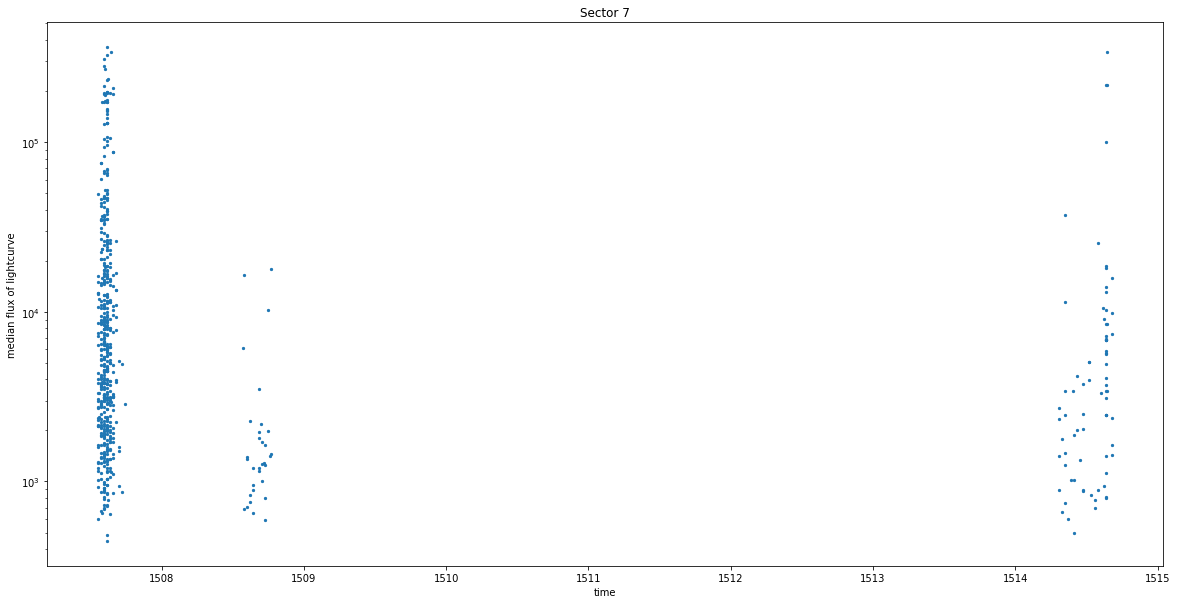

Sector 8 dataframe does not exist. Skipping.


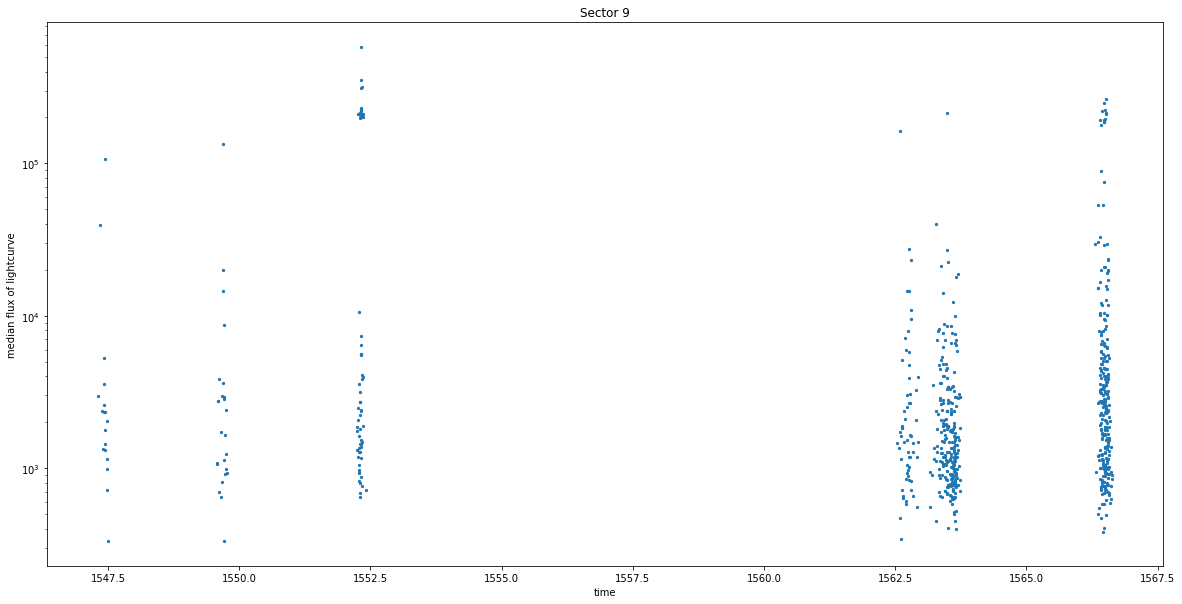

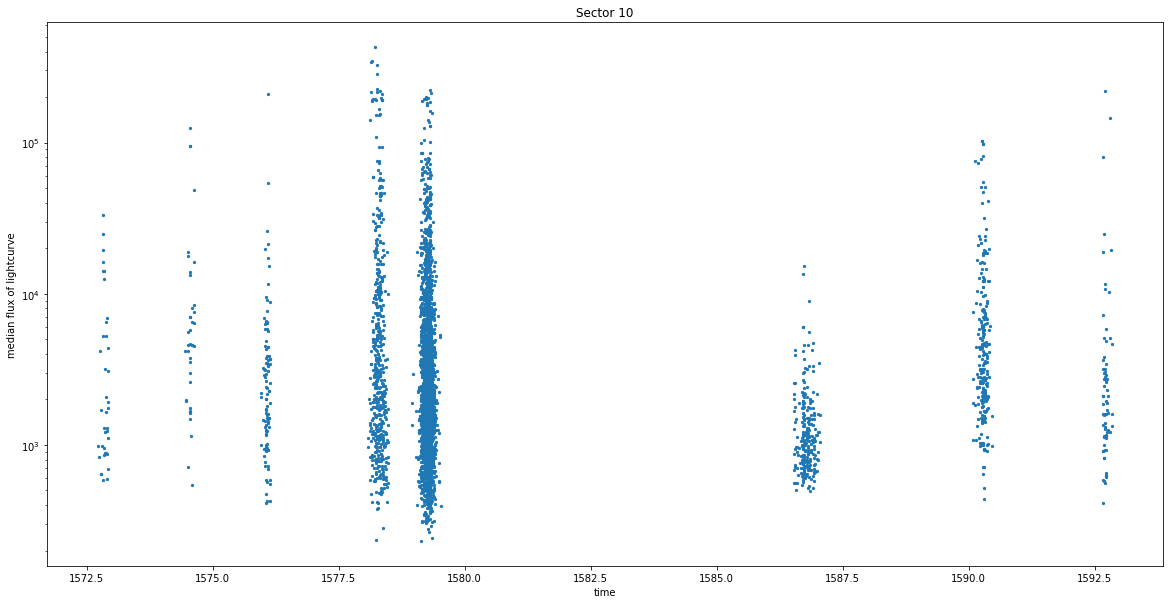

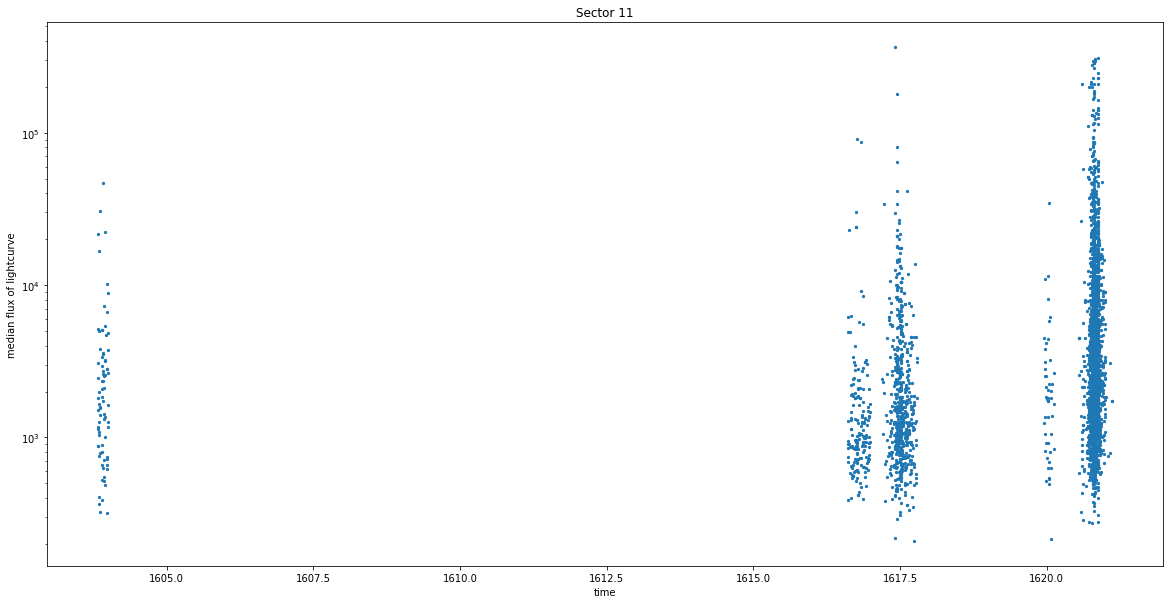

Sector 12 dataframe does not exist. Skipping.
Sector 13 dataframe does not exist. Skipping.


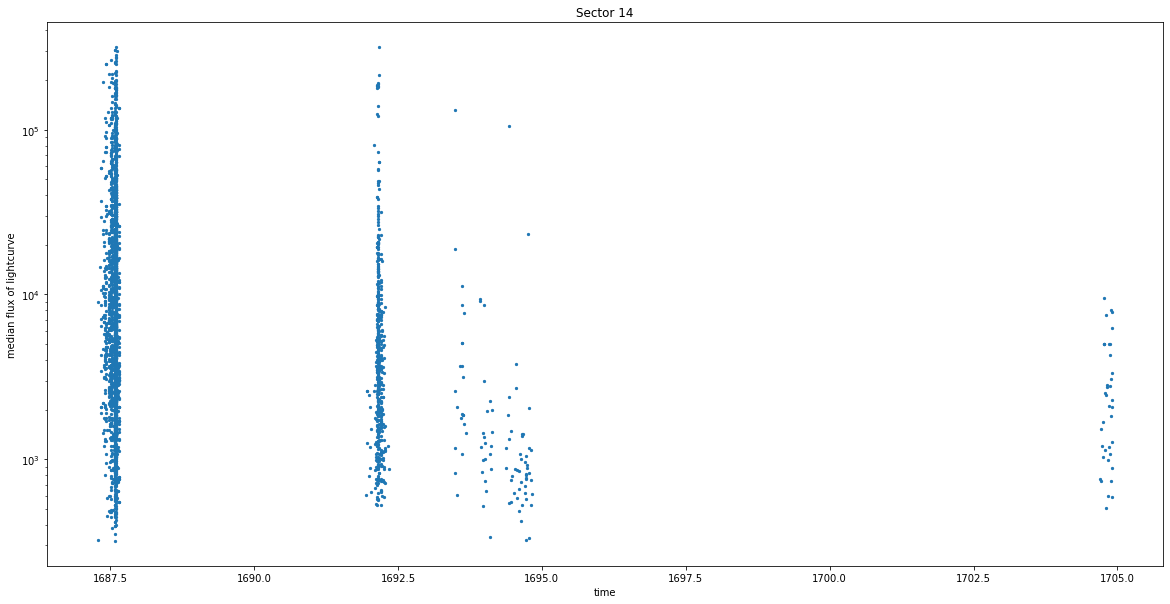

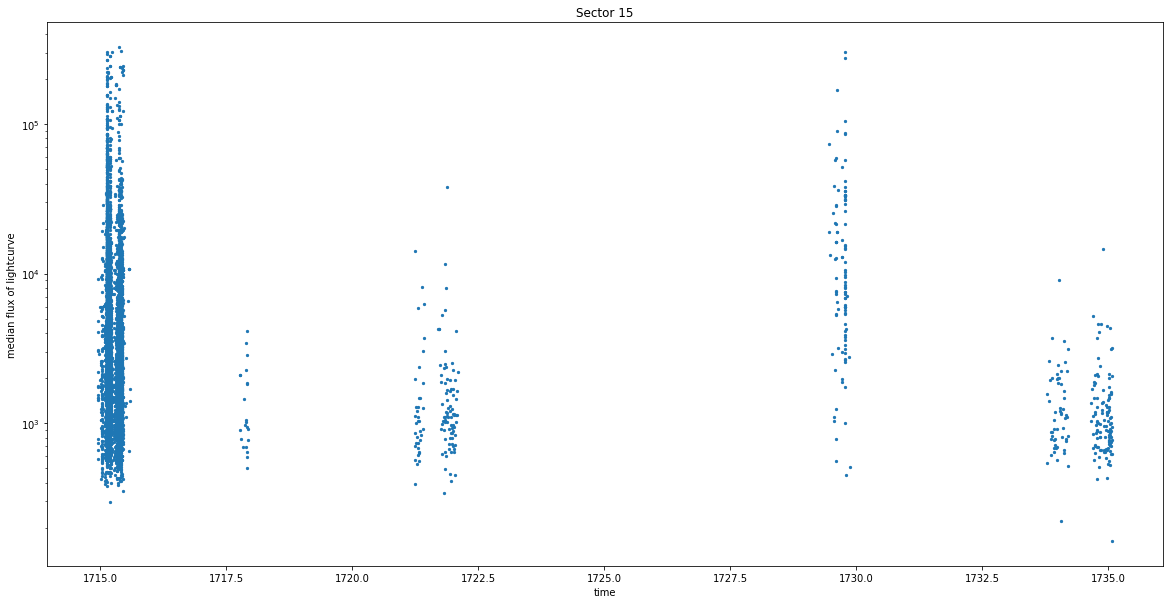

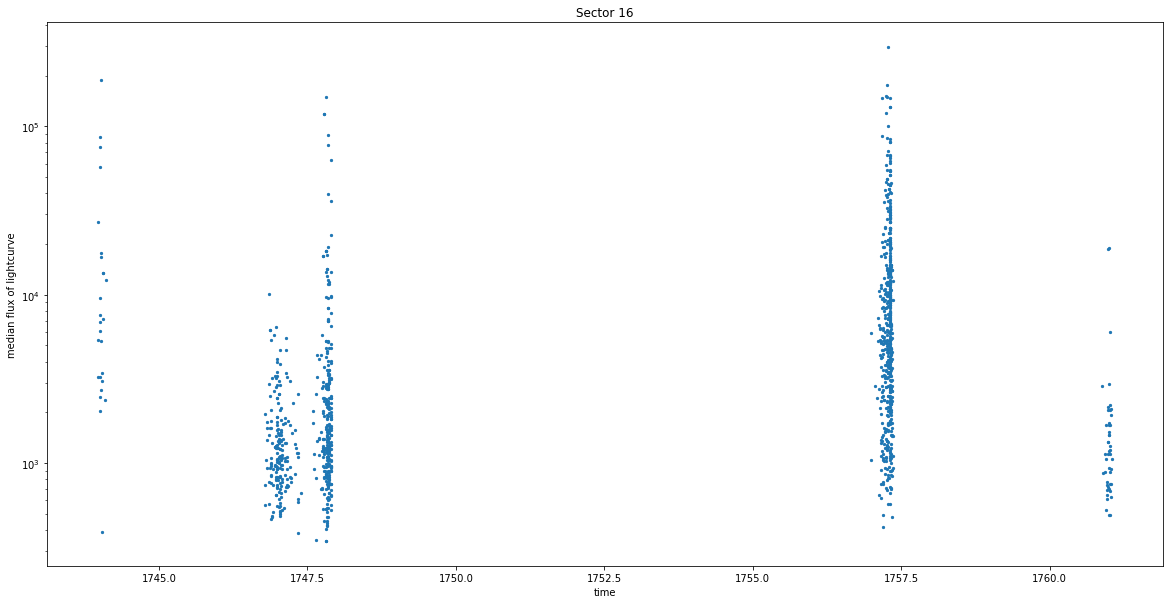

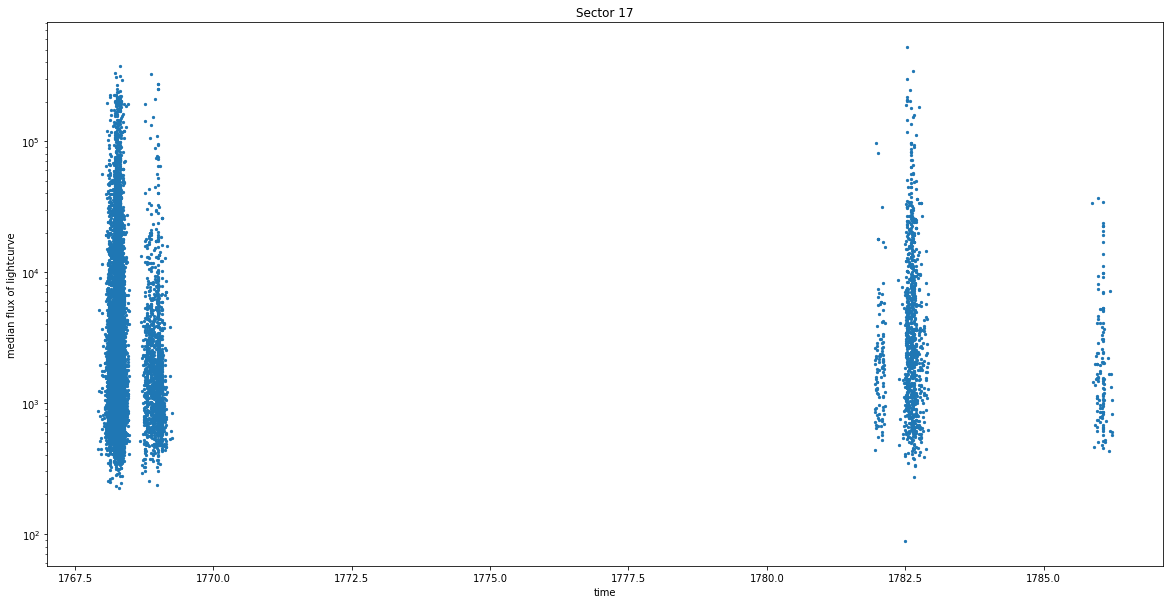

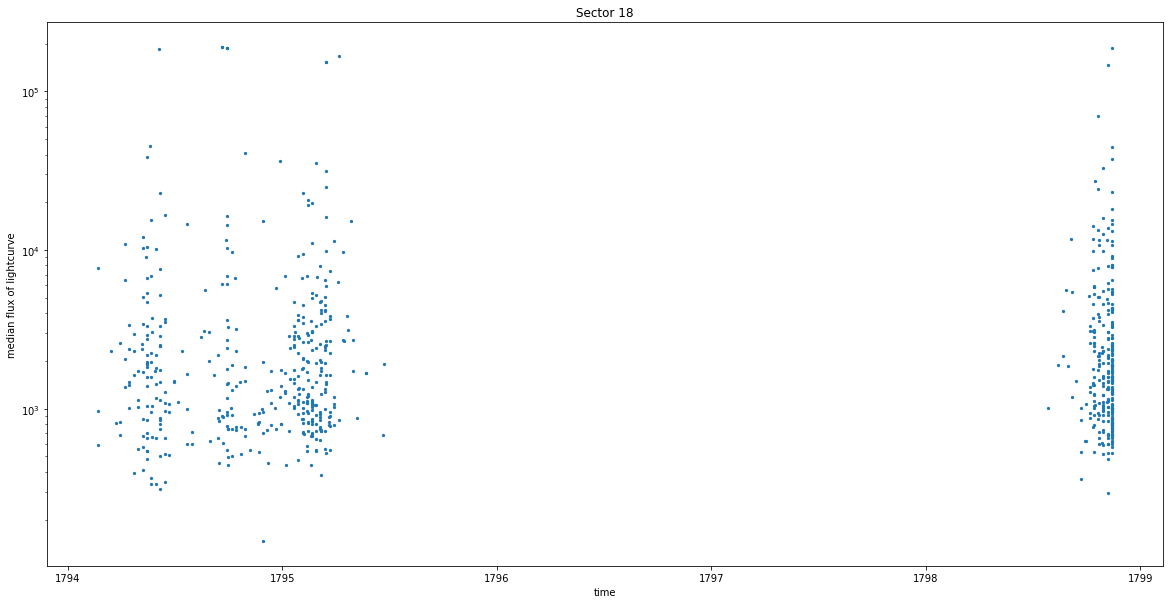

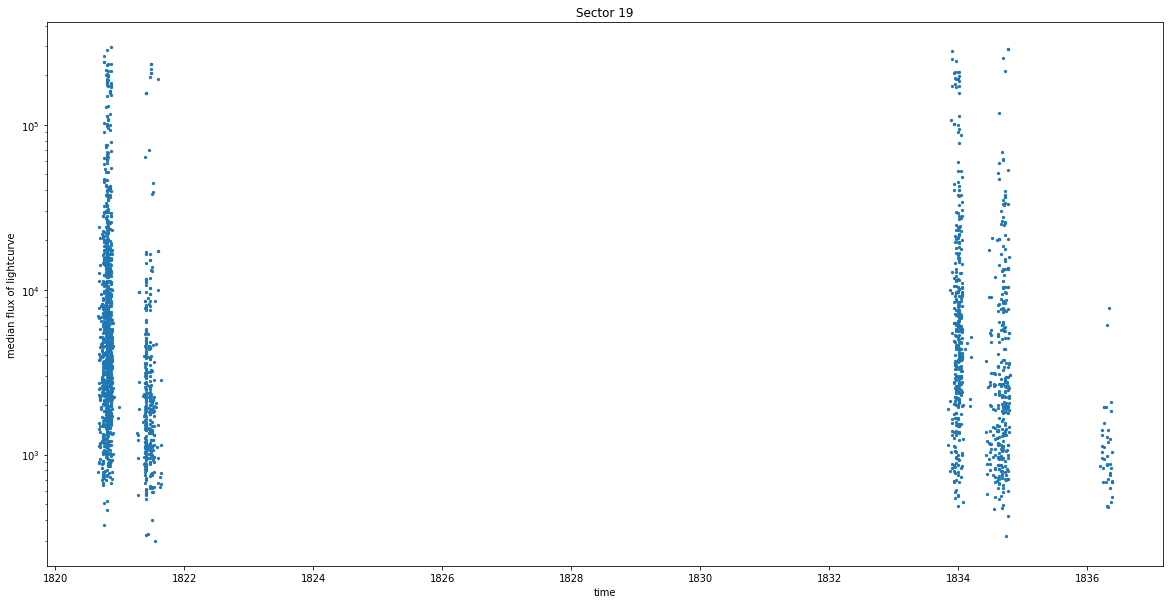

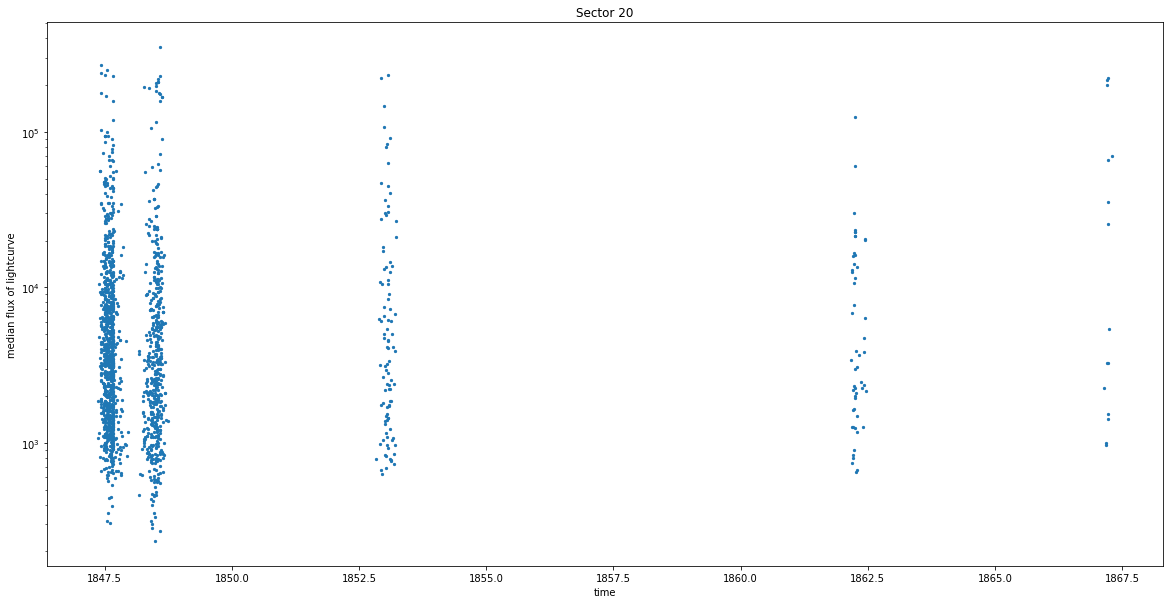

In [6]:
for i in range(1,len(sector_values)+1):
    # Construct the dataframe variable name
    try:
        df = sector_data[f'S{i}']
        plt.figure(figsize=(20,10))
        plt.scatter(df.time, df.orig_median_flux,s=5)
        plt.yscale('log')
        plt.xlabel('time')
        plt.ylabel('median flux of lightcurve')
        plt.title(f'Sector {i}')
        plt.show()
    except:
        print(f"Sector {i} dataframe does not exist. Skipping.")
        continue

---

In [8]:
import os
os.chdir('../../scripts')
from analysis_tools_cython import *
from tqdm import tqdm

In [ ]:
extra_bad = []
for i in tqdm(data.abs_path):
        lc, lc_info = import_lightcurve(i)
        lc = lc['TIME', 'CORR_FLUX','QUALITY', 'FLUX_ERR', 'FLUX_BKG']
        results, _ = processing(lc, lc_info=lc_info, method='median')#, make_plots=True)
        time = results.split()[4]
        closest_index = min(range(len(lc['TIME'].data)), key=lambda i: abs(lc['TIME'].data[i] - float(time)))

        # Get the corresponding flux value
        corresponding_flux = lc['FLUX_BKG'].data[closest_index]
        median = np.nanmedian(lc['FLUX_BKG'])
        mad = np.median(np.abs(lc['FLUX_BKG'] - np.median(lc['FLUX_BKG'])))
        threshold = 5*mad
        if corresponding_flux > median:
            extra_bad.append(lc_info[0])
            #print(f"Background flux value is {corresponding_flux}. 5 sigma threshold is {threshold}. exceeds threshold")
    
        

 20%|█▉        | 9321/47387 [59:06<3:58:07,  2.66it/s]

In [19]:
extra_bad

[115190908]

In [10]:
import lightkurve as lk
from tqdm import tqdm

In [11]:
tic_ids = data.TIC_ID.values[:20]
sectors = data.Sector.values[:20]

In [12]:
lcs = []

for idx, (tic_id, sector) in tqdm(enumerate(zip(tic_ids,sectors))):
    try:
        lc = lk.search_lightcurve(f"TIC {tic_id}", sector=sector)
        lc.table["dataURL"] = lc.table["dataURI"]  # workaround MAST issue
        lc_download = lc[0].download()
        lcs.append(lc_download)
    except:
        print(f"unable to download {tic_id}. Skipping")
        continue

20it [00:12,  1.62it/s]


In [ ]:
tic_ids

In [ ]:
lc = lc[1].download()

In [ ]:
lc = lc.flatten()

In [ ]:
lc.plot()

In [ ]:
lcs = []
for tic_id in tic_ids:
    # Use Lightkurve's search_lightcurve function to search for and retrieve the light curve for each TIC ID
    lc = lk.search_lightcurve(target=f'TIC {tic_id}', author='QLP',sector=21)  # Author 'SPOC' is for TESS data
    lc.table["dataURL"] = lc.table["dataURI"]  # workaround MAST issue
    try:
        lc = search_result[0].download()
    
        lcs.append(lc)
    except KeyError:
        pass